<a href="https://colab.research.google.com/github/nastyabekesheva/labs/blob/master/Math/Physics/physics_labs_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd

>[Lab 1](#scrollTo=86MdTIYSpHi3)

>>[Data](#scrollTo=k6d2zG5spxKY)

>>[Calculations](#scrollTo=E7JnOdEjAlL-)

>>[Graph of dependecy between approximized $\varphi$ and $R^2$](#scrollTo=Av3O17BWMfnN)

>>[Erorr calculations](#scrollTo=DpFS704MMugE)

>>[Display data](#scrollTo=-lI_4lANM1HT)

>[Lab 2](#scrollTo=oOrJLR3huLVD)

>>[Data](#scrollTo=tpDOWUVnuOd4)

>>[Graph of dependecy between U and I](#scrollTo=02utVQrYA2IV)

>>[Aproximization of data detailed](#scrollTo=A0V0wkoPZUmC)

>>[Graph of dependecy between approximized U and I](#scrollTo=I2ZhOk8xA_Hm)

>>[Calculations](#scrollTo=CNV_u4gpEnfq)

>>[Display data](#scrollTo=JNx4UdG-oeBX)

>>[Some more graphs](#scrollTo=KVRftF2jn1B2)

>>[And some more graphs](#scrollTo=CqhUQ0fHtMu1)

>[Lab 3](#scrollTo=opVUazdp7ALd)

>>[Part 1](#scrollTo=SqQC-MOqF2V5)

>>[Graph of dependecy between approximized $f$ and $R$](#scrollTo=yOY7YkbbNFxs)

>>[Calculations](#scrollTo=f9KwD9s7NO75)

>>[Graph of dependecy between approximized $X_c$ and $C$](#scrollTo=19ieTKJ4NQwD)

>>[Calculations](#scrollTo=5l_NaCpzNUt7)

>>[Display data](#scrollTo=9f0sJy-kNYgn)

>>[Graph of dependecy between approximized $f$ and $\varphi$](#scrollTo=a58lcUtiNa7E)

>>[Part 2](#scrollTo=RqCbLRTIFymE)

>>[Graph of dependecy between approximized $f$ and $R$](#scrollTo=eRVtiCdmNh8V)

>>[Calculations](#scrollTo=tUmsAsuRNlJR)

>>[Graph of dependecy between approximized $X_l$ and $L$](#scrollTo=BLEtFlMmNnoI)

>>[Calculations](#scrollTo=oLC49PqhNrKu)

>>[Graph of dependecy between approximized $f$ and $\varphi$](#scrollTo=88NoWP3WNs0L)



# Lab 1

## Data

In [ ]:
r = 0.02 #
k = 10**10 #Nm^2/Kl^2
phi = np.array([2500, 2500, 2500, 5000, 5000, 5000, 7500, 7500, 7500, 10000, 10000, 10000, 12500, 12500, 12500, 15000, 15000, 15000]) #kV
R = np.array([0.05, 0.048, 0.049, 0.07, 0.068, 0.071, 0.088, 0.089, 0.09, 0.124, 0.125, 0.126, 0.175, 0.176, 0.173, 0.21, 0.209, 0.212]) #cm

In [ ]:
data = {
    'r': np.repeat(r, 18),
    'k': np.repeat(k, 18),
    'phi': phi,
    'R': R
}

In [ ]:
pd.DataFrame.from_dict(data)

,r,k,phi,R
0,0.02,10000000000,2500,0.050
1,0.02,10000000000,2500,0.048
2,0.02,10000000000,2500,0.049
3,0.02,10000000000,5000,0.070
4,0.02,10000000000,5000,0.068
5,0.02,10000000000,5000,0.071
6,0.02,10000000000,7500,0.088
7,0.02,10000000000,7500,0.089
8,0.02,10000000000,7500,0.090
9,0.02,10000000000,10000,0.124


We need to find:


*   $\langle R\rangle$
*   $q$
*   $E$
*   $R_{theor}$
*   $\Delta r$
*   $\varepsilon_r$



## Calculations

In [ ]:
def calculate_R_avrg(data):
  temp = 0
  R_avrg = np.array([])

  for i in range(1, len(data['R'])+1):   
    temp += data['R'][i-1]
    if i % 3 == 0:
      temp /= 3
      R_avrg = np.append(R_avrg, np.repeat(temp, 3))
      temp = 0

  data.update({'<R>': R_avrg})  
  return data


In [ ]:
def calculate_q(data):
  data.update({'q':np.divide(np.multiply(data['phi'], data['r']), data['k'])})
  return data

In [ ]:
def calculate_E(data):
  data.update({'E': np.divide(np.multiply(data['k'], data['q']), np.power(data['<R>'], 2))})
  data.update({'E': np.repeat(np.sum(data['E']) / len(data['E']), len(data['E']))})
  return data

In [ ]:
data = calculate_R_avrg(data)
data = calculate_q(data)
data = calculate_E(data)


## Graph of dependecy between approximized $\varphi$ and $R^2$

Equation of approximation / Linear regration:  
2.686e+05 x + 4024


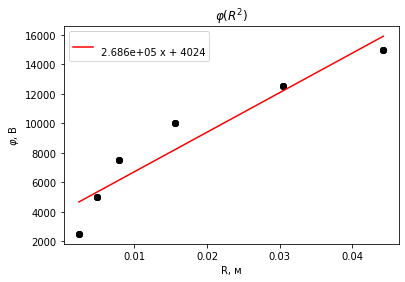

In [ ]:
x=np.power(data['<R>'], 2)
y=data['phi']

plt.scatter(x,y,color="black")
plt.title(r"$\varphi(R^2)$")
plt.xlabel("R, м")
plt.ylabel(r"$\varphi$, В")

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)

plt.plot(x,linear_model_fn(x),color="red")
print(f'Equation of approximation / Linear regration: {np.poly1d(linear_model)}')
#data.update({'k(approx)':np.repeat(abs(np.poly1d(linear_model).c[0]), len(x))})
#data.update({'b(approx)':np.repeat(abs(np.poly1d(linear_model).c[1]), len(x))})
plt.legend([str(np.poly1d(linear_model))])
plt.show()

## Erorr calculations

In [ ]:
def calculate_R_theor(data):
  data.update({'R(theor)': np.sqrt(np.divide(np.multiply(data['k'], data['q']), data['E']))})
  return data

In [ ]:
def calculate_delta_R(data):
  #data.update({'delta R':np.multiply(np.sqrt(np.sum(np.power(np.subtract(data['R'], np.repeat(np.sum(data['R']) / len(data['R']), len(data['R']))), 2)) / (len(data['R']) * (len(data['R']) - 1))), 100)})
  return np.sqrt(np.sum(np.power(np.subtract(data, np.repeat(np.sum(data) / len(data), len(data))), 2)) / (len(data) * (len(data) - 1)))

In [ ]:
def calculate_all_delta_R(data):
  d1 = np.repeat(calculate_delta_R(data['R'][0:3]), 3)
  d2 = np.repeat(calculate_delta_R(data['R'][3:6]), 3)
  d1 = np.concatenate((d1, d2))
  d3 = np.repeat(calculate_delta_R(data['R'][6:9]), 3)
  d1 = np.concatenate((d1, d3))
  d4 = np.repeat(calculate_delta_R(data['R'][9:12]), 3)
  d1 = np.concatenate((d1, d4))
  d5 = np.repeat(calculate_delta_R(data['R'][12:15]), 3)
  d1 = np.concatenate((d1, d5))
  d6 = np.repeat(calculate_delta_R(data['R'][15:18]), 3)
  d1 = np.concatenate((d1, d6))
  data.update({'delta R':d1})
  return data

In [ ]:
def calculate_epsilon_R(data):
  data.update({'epsilon R': np.multiply(np.divide(data['delta R'], data['<R>'][0]), 100)})
  return data

In [ ]:
data = calculate_R_theor(data)
data = calculate_all_delta_R(data)
data = calculate_epsilon_R(data)

## Display data

In [ ]:
pd.options.display.float_format = '{:.8f}'.format
pd.DataFrame.from_dict(data)[['q', 'delta R']]

,q,delta R
0,0.00000001,0.00057735
1,0.00000001,0.00057735
2,0.00000001,0.00057735
3,0.00000001,0.00088192
4,0.00000001,0.00088192
5,0.00000001,0.00088192
6,0.00000001,0.00057735
7,0.00000001,0.00057735
8,0.00000001,0.00057735
9,0.00000002,0.00057735


In [ ]:
pd.options.display.float_format = '{:.3f}'.format
pd.DataFrame.from_dict(data).round(3)

,r,k,phi,R,<R>,q,E,R(theor),delta R,epsilon R
0,0.020,10000000000,2500,0.050,0.049,0.000,14690.202,0.058,0.001,1.178
1,0.020,10000000000,2500,0.048,0.049,0.000,14690.202,0.058,0.001,1.178
2,0.020,10000000000,2500,0.049,0.049,0.000,14690.202,0.058,0.001,1.178
3,0.020,10000000000,5000,0.070,0.070,0.000,14690.202,0.083,0.001,1.800
4,0.020,10000000000,5000,0.068,0.070,0.000,14690.202,0.083,0.001,1.800
5,0.020,10000000000,5000,0.071,0.070,0.000,14690.202,0.083,0.001,1.800
6,0.020,10000000000,7500,0.088,0.089,0.000,14690.202,0.101,0.001,1.178
7,0.020,10000000000,7500,0.089,0.089,0.000,14690.202,0.101,0.001,1.178
8,0.020,10000000000,7500,0.090,0.089,0.000,14690.202,0.101,0.001,1.178
9,0.020,10000000000,10000,0.124,0.125,0.000,14690.202,0.117,0.001,1.178


# Lab 2

## Data

In [ ]:
battery = {
     'U_0' : np.repeat(4.5, 9),
     'I' : np.insert(np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 0.9]), 0, 0),
     'U' : np.insert(np.array([4.3, 3.8, 3.6, 3.5, 2.8, 2.6, 2.25, 1.5]), 0, 4.5)
}
accumulator = {
     'U_0' : np.repeat(13, 21),
     'I' : np.insert(np.array([float(i/10) for i in range(1, 21)]), 0, 0),
     'U' : np.insert(np.array([float(i/100) for i in range(1200,1300) if i%5==0][::-1]), 0, 13)
}
power_supply = {
     'U_0' : np.repeat(12.13, 9),
     'I' : np.insert(np.array([float(i/100) for i in range(1,225) if i%25==0]), 0, 0),
     'U' : np.insert(np.array([12.09, 12.02, 11.9, 11.85, 11.8, 11.77, 11.71, 11.65]), 0, 12.13)
}

In [ ]:
len(np.array([float(i/100) for i in range(1200,1300) if i%5==0][::-1]))

20

In [ ]:
pd.DataFrame.from_dict(battery)

,U_0,I,U
0,4.500,0.000,4.500
1,4.500,0.100,4.300
2,4.500,0.200,3.800
3,4.500,0.300,3.600
4,4.500,0.400,3.500
5,4.500,0.500,2.800
6,4.500,0.600,2.600
7,4.500,0.750,2.250
8,4.500,0.900,1.500


In [ ]:
pd.DataFrame.from_dict(accumulator)

,U_0,I,U
0,13,0.000,13.000
1,13,0.100,12.950
2,13,0.200,12.900
3,13,0.300,12.850
4,13,0.400,12.800
5,13,0.500,12.750
6,13,0.600,12.700
7,13,0.700,12.650
8,13,0.800,12.600
9,13,0.900,12.550


In [ ]:
pd.DataFrame.from_dict(power_supply)

,U_0,I,U
0,12.130,0.000,12.130
1,12.130,0.250,12.090
2,12.130,0.500,12.020
3,12.130,0.750,11.900
4,12.130,1.000,11.850
5,12.130,1.250,11.800
6,12.130,1.500,11.770
7,12.130,1.750,11.710
8,12.130,2.000,11.650


We need to find:



*   $R_i$
*   $R_e$
*   $U_i$
*   $U_e$
*   $R_i$ approximated
*   $P_e$
*   $P_i$
*   $I_{kz}$
*   $P_0$
*   $\dfrac{P(R_e)}{P_0}$
*   $\dfrac{P(R_i)}{P_0}$
*   $P$
*   $\dfrac{P}{P_0}$
*   Efficiency
*   $\langle R\rangle$
*   $\Delta_{R_i}$
*   $\varepsilon_{R_i}$






## Graph of dependecy between U and I 

In [ ]:
#battery
xnew_b = np.linspace(battery['I'].min(), battery['I'].max(), 200) 
spl_b = make_interp_spline(battery['I'], battery['U'], k=3)
y_smooth_b = spl_b(xnew_b)

#accumulator
xnew_a = np.linspace(accumulator['I'].min(), accumulator['I'].max(), 200) 
spl_a = make_interp_spline(accumulator['I'], accumulator['U'], k=3)
y_smooth_a = spl_a(xnew_a)

#power_supply
xnew_ps = np.linspace(power_supply['I'].min(), power_supply['I'].max(), 200) 
spl_ps = make_interp_spline(power_supply['I'], power_supply['U'], k=3)
y_smooth_ps = spl_ps(xnew_ps)

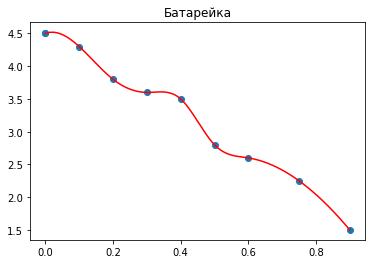

In [ ]:
plt.plot(xnew_b, y_smooth_b, 'r')
plt.scatter(np.insert(battery['I'], 0, 0), np.insert(battery['U'], 0, 4.5))
plt.title('Батарейка')
plt.show()

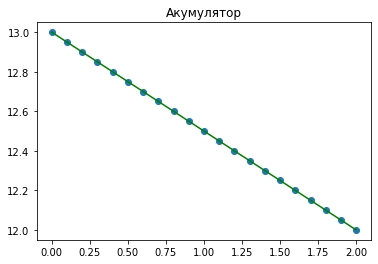

In [ ]:
plt.plot(xnew_a, y_smooth_a, 'g')
plt.title('Акумулятор')
plt.scatter(accumulator['I'], accumulator['U'])
plt.show()

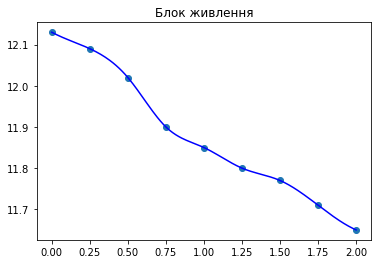

In [ ]:
plt.plot(xnew_ps, y_smooth_ps, 'b')
plt.title('Блок живлення')
plt.scatter(power_supply['I'], power_supply['U'])
plt.show()

## Aproximization of data detailed

In [ ]:
approx_battery = {
    'U': battery['U'],
    'I': battery['I']
}
approx_accumulator = {
    'U': accumulator['U'],
    'I': accumulator['I']
}
approx_power_supply = {
    'U': power_supply['U'],
    'I': power_supply['I']
}

In [ ]:
def calculate_avrg(data, key):
  data.update({f'<{key}>': np.repeat(np.sum(data[key] / len(data[key])), len(data[key]))})
  return data

In [ ]:
def calculate_prod(data, key1, key2):
  data.update({f'{key1}{key2}': np.multiply(data[key1], data[key2])})
  return data

In [ ]:
def calculate_sq(data, key):
  data.update({f'{key}^2': np.power(data[key], 2)})
  return data

In [ ]:
def calculate_k(data):
  data.update({'k': np.divide(np.subtract(data['<IU>'], np.multiply(data['<I>'], data['<U>'])), np.subtract(data['<I^2>'], data['<I>^2']))})
  return data

In [ ]:
def calculate_b(data):
  data.update({'b': np.subtract(data['<U>'], np.multiply(data['k'], data['<I>']))})
  return data

In [ ]:
def calculate_approx(data):
  data = calculate_avrg(data, 'I')
  data = calculate_avrg(data, 'U')
  data = calculate_sq(data, 'I')
  data = calculate_sq(data, '<I>')
  data = calculate_avrg(data, 'I^2')
  data = calculate_prod(data, 'I', 'U')
  data = calculate_avrg(data, 'IU')
  data = calculate_k(data)
  data = calculate_b(data)

  return data

In [ ]:
approx_battery = calculate_approx(approx_battery)
approx_accumulator = calculate_approx(approx_accumulator)
approx_power_supply = calculate_approx(approx_power_supply)

In [ ]:
pd.DataFrame.from_dict(approx_battery).round(4)

,U,I,<I>,<U>,I^2,<I>^2,<I^2>,IU,<IU>,k,b
0,4.500,0.000,0.417,3.206,0.000,0.174,0.254,0.000,1.074,-3.268,4.567
1,4.300,0.100,0.417,3.206,0.010,0.174,0.254,0.430,1.074,-3.268,4.567
2,3.800,0.200,0.417,3.206,0.040,0.174,0.254,0.760,1.074,-3.268,4.567
3,3.600,0.300,0.417,3.206,0.090,0.174,0.254,1.080,1.074,-3.268,4.567
4,3.500,0.400,0.417,3.206,0.160,0.174,0.254,1.400,1.074,-3.268,4.567
5,2.800,0.500,0.417,3.206,0.250,0.174,0.254,1.400,1.074,-3.268,4.567
6,2.600,0.600,0.417,3.206,0.360,0.174,0.254,1.560,1.074,-3.268,4.567
7,2.250,0.750,0.417,3.206,0.562,0.174,0.254,1.688,1.074,-3.268,4.567
8,1.500,0.900,0.417,3.206,0.810,0.174,0.254,1.350,1.074,-3.268,4.567


In [ ]:
pd.DataFrame.from_dict(approx_accumulator).round(4)

,U,I,<I>,<U>,I^2,<I>^2,<I^2>,IU,<IU>,k,b
0,13.000,0.000,1.000,12.500,0.000,1.000,1.367,0.000,12.317,-0.500,13.000
1,12.950,0.100,1.000,12.500,0.010,1.000,1.367,1.295,12.317,-0.500,13.000
2,12.900,0.200,1.000,12.500,0.040,1.000,1.367,2.580,12.317,-0.500,13.000
3,12.850,0.300,1.000,12.500,0.090,1.000,1.367,3.855,12.317,-0.500,13.000
4,12.800,0.400,1.000,12.500,0.160,1.000,1.367,5.120,12.317,-0.500,13.000
5,12.750,0.500,1.000,12.500,0.250,1.000,1.367,6.375,12.317,-0.500,13.000
6,12.700,0.600,1.000,12.500,0.360,1.000,1.367,7.620,12.317,-0.500,13.000
7,12.650,0.700,1.000,12.500,0.490,1.000,1.367,8.855,12.317,-0.500,13.000
8,12.600,0.800,1.000,12.500,0.640,1.000,1.367,10.080,12.317,-0.500,13.000
9,12.550,0.900,1.000,12.500,0.810,1.000,1.367,11.295,12.317,-0.500,13.000


In [ ]:
pd.DataFrame.from_dict(approx_power_supply).round(4)

,U,I,<I>,<U>,I^2,<I>^2,<I^2>,IU,<IU>,k,b
0,12.130,0.000,1.000,11.880,0.000,1.000,1.417,0.000,11.778,-0.244,12.124
1,12.090,0.250,1.000,11.880,0.062,1.000,1.417,3.022,11.778,-0.244,12.124
2,12.020,0.500,1.000,11.880,0.250,1.000,1.417,6.010,11.778,-0.244,12.124
3,11.900,0.750,1.000,11.880,0.562,1.000,1.417,8.925,11.778,-0.244,12.124
4,11.850,1.000,1.000,11.880,1.000,1.000,1.417,11.850,11.778,-0.244,12.124
5,11.800,1.250,1.000,11.880,1.562,1.000,1.417,14.750,11.778,-0.244,12.124
6,11.770,1.500,1.000,11.880,2.250,1.000,1.417,17.655,11.778,-0.244,12.124
7,11.710,1.750,1.000,11.880,3.062,1.000,1.417,20.492,11.778,-0.244,12.124
8,11.650,2.000,1.000,11.880,4.000,1.000,1.417,23.300,11.778,-0.244,12.124


## Graph of dependecy between approximized U and I 

Equation of approximation / Linear regration:  
-3.269 x + 4.567


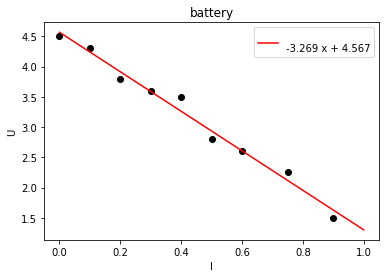

In [ ]:
x=battery['I']
y=battery['U']

plt.scatter(x,y,color="black")
plt.title("battery")
plt.xlabel("I")
plt.ylabel("U")

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,2)
plt.plot(x_s,linear_model_fn(x_s),color="red")

print(f'Equation of approximation / Linear regration: {np.poly1d(linear_model)}')
battery.update({'R_i(approx)':np.repeat(abs(np.poly1d(linear_model).c[0]), len(x))})

plt.legend([str(np.poly1d(linear_model))])
plt.show()

Equation of approximation / Linear regration:  
-0.5 x + 13


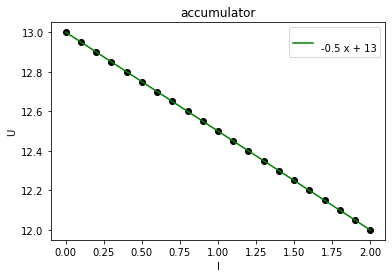

In [ ]:
x=accumulator['I']
y=accumulator['U']

plt.scatter(x,y,color="black")
plt.title("accumulator")
plt.xlabel("I")
plt.ylabel("U")

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,3)
plt.plot(x_s,linear_model_fn(x_s),color="green")

print(f'Equation of approximation / Linear regration: {np.poly1d(linear_model)}')
accumulator.update({'R_i(approx)':np.repeat(abs(np.poly1d(linear_model).c[0]), len(x))})

plt.legend([str(np.poly1d(linear_model))])
plt.show()

Equation of approximation / Linear regration:  
-0.244 x + 12.12


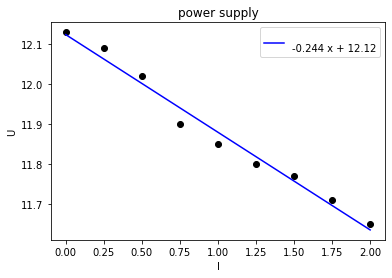

In [ ]:
x=power_supply['I']
y=power_supply['U']

plt.scatter(x,y,color="black")
plt.title("power supply")
plt.xlabel("I")
plt.ylabel("U")

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,3)
plt.plot(x_s,linear_model_fn(x_s),color="blue")

print(f'Equation of approximation / Linear regration: {np.poly1d(linear_model)}')
power_supply.update({'R_i(approx)':np.repeat(abs(np.poly1d(linear_model).c[0]), len(x))})

plt.legend([str(np.poly1d(linear_model))])
plt.show()

## Calculations

In [ ]:
for i in battery:
  battery[i] = battery[i][1:]

In [ ]:
for i in accumulator:
  accumulator[i] = accumulator[i][1:]

In [ ]:
for i in power_supply:
  power_supply[i] = power_supply[i][1:]

In [ ]:
def calculate_R_i(data):
  #data.update({'R_i':np.divide(np.subtract(data['U_0'], data['I']), data['U'])})
  data.update({'R_i':np.divide(np.subtract(data['U_0'], data['U']), data['I'])})
  return data

In [ ]:
def calculate_R_e(data):
  data.update({'R_e':np.absolute((np.divide(data['U'], data['I'])))})
  return data

In [ ]:
#def calculate_R_approx(data): added while building graphs

In [ ]:
def calculate_U_i(data):
  data.update({'U_i':np.absolute(np.multiply(data['I'], data['R_i(approx)']))})
  return data

In [ ]:
def calculate_U_e(data):
  data.update({'U_e':np.absolute(np.subtract(data['U_0'], data['U_i']))})
  return data

In [ ]:
def calculate_P_e(data):
  data.update({'P_e':np.absolute(np.multiply(np.multiply(data['I'], data['I']), data['R_e']))})
  return data

In [ ]:
def calculate_P_i(data):
  data.update({'P_i':np.absolute(np.multiply(np.multiply(data['I'], data['I']), data['R_i(approx)']))})
  return data

In [ ]:
def calculate_I_kz(data):
  data.update({'I_kz':np.absolute(np.divide(data['U_0'], data['R_i(approx)']))})
  return data

In [ ]:
def calculate_P_0(data):
  data.update({'P_0':np.absolute(np.multiply(data['U_0'], data['I_kz']))})
  return data

In [ ]:
def calculate_div_Pe0(data):
  data.update({'P_e/P_0':np.absolute(np.divide(data['P_e'], data['P_0']))})
  return data

In [ ]:
def calculate_div_Pi0(data):
  data.update({'P_i/P_0':np.absolute(np.divide(data['P_i'], data['P_0']))})
  return data

In [ ]:
def calculate_P(data):
  data.update({'P':np.absolute(np.add(data['P_i'], data['P_e']))})
  return data

In [ ]:
def calculate_div_PP0(data):
  data.update({'P/P_0':np.absolute(np.divide(data['P'], data['P_0']))})
  return data

In [ ]:
def calculate_efficiency(data):
  data.update({'Efficiency':np.absolute(np.multiply(data['P_e/P_0'], 100))})
  return data

In [ ]:
def calculate_R_abs(data):
  data.update({'{R}':np.absolute(np.divide(np.repeat(np.sum(data['R_i']), len(data['R_i'])), len(data['R_i'])))})
  return data

In [ ]:
def calculate_delta_R(data):
  #R_avrg = np.sum(data['R_i']) / len(data['R_i'])
  #s = np.sqrt(np.sum(np.power(np.subtract(data['R_i'], np.repeat(R_avrg, len(data['R_i']))), 2)) / (len(data['R_i']) * (len(data['R_i']) - 1)))
  data.update({'delta R':np.multiply(np.sqrt(np.sum(np.power(np.subtract(data['R_i'], np.repeat(np.sum(data['R_i']) / len(data['R_i']), len(data['R_i']))), 2)) / (len(data['R_i']) * (len(data['R_i']) - 1))), 100)})
  return data

In [ ]:
def calculate_epsilon_R(data):
  #data.update({'epsilon R':np.multiply(np.repeat(data['delta R'] / np.sum(data['R_i']) / len(data['R_i']), len(data['R_i'])), 100)})
  data.update({'epsilon R':np.divide(data['delta R'], np.repeat(np.sum(data['R_i']) / len(data['R_i']), len(data['R_i'])))})
  return data

In [ ]:
def calculate_all(data):
  data = calculate_R_i(data)
  data = calculate_R_e(data)
  data = calculate_U_i(data)
  data = calculate_U_e(data)
  data = calculate_P_e(data)
  data = calculate_P_i(data)
  data = calculate_I_kz(data)
  data = calculate_P_0(data)
  data = calculate_div_Pe0(data)
  data = calculate_div_Pi0(data)
  data = calculate_P(data)
  data = calculate_div_PP0(data)
  data = calculate_efficiency(data)
  data = calculate_R_abs(data)
  data = calculate_delta_R(data)
  data = calculate_epsilon_R(data)

  return data

In [ ]:
battery = calculate_all(battery)
accumulator = calculate_all(accumulator)
power_supply = calculate_all(power_supply)

## Display data

In [ ]:
df_battery = pd.DataFrame.from_dict(battery)
df_battery = df_battery.round(2)
df_battery

,U_0,I,U,R_i(approx),R_i,R_e,U_i,U_e,P_e,P_i,I_kz,P_0,P_e/P_0,P_i/P_0,P,P/P_0,Efficiency,{R},delta R,epsilon R
0,4.500,0.100,4.300,3.270,2.000,43.000,0.330,4.170,0.430,0.030,1.380,6.200,0.070,0.010,0.460,0.070,6.940,2.990,17.920,6.000
1,4.500,0.200,3.800,3.270,3.500,19.000,0.650,3.850,0.760,0.130,1.380,6.200,0.120,0.020,0.890,0.140,12.270,2.990,17.920,6.000
2,4.500,0.300,3.600,3.270,3.000,12.000,0.980,3.520,1.080,0.290,1.380,6.200,0.170,0.050,1.370,0.220,17.430,2.990,17.920,6.000
3,4.500,0.400,3.500,3.270,2.500,8.750,1.310,3.190,1.400,0.520,1.380,6.200,0.230,0.080,1.920,0.310,22.600,2.990,17.920,6.000
4,4.500,0.500,2.800,3.270,3.400,5.600,1.630,2.870,1.400,0.820,1.380,6.200,0.230,0.130,2.220,0.360,22.600,2.990,17.920,6.000
5,4.500,0.600,2.600,3.270,3.170,4.330,1.960,2.540,1.560,1.180,1.380,6.200,0.250,0.190,2.740,0.440,25.180,2.990,17.920,6.000
6,4.500,0.750,2.250,3.270,3.000,3.000,2.450,2.050,1.690,1.840,1.380,6.200,0.270,0.300,3.530,0.570,27.240,2.990,17.920,6.000
7,4.500,0.900,1.500,3.270,3.330,1.670,2.940,1.560,1.350,2.650,1.380,6.200,0.220,0.430,4.000,0.650,21.790,2.990,17.920,6.000


In [ ]:
df_accumulator = pd.DataFrame.from_dict(accumulator)
df_accumulator = df_accumulator.round(2)
df_accumulator

,U_0,I,U,R_i(approx),R_i,R_e,U_i,U_e,P_e,P_i,I_kz,P_0,P_e/P_0,P_i/P_0,P,P/P_0,Efficiency,{R},delta R,epsilon R
0,13,0.100,12.950,0.500,0.500,129.500,0.050,12.950,1.300,0.000,26.000,338.000,0.000,0.000,1.300,0.000,0.380,0.500,0.000,0.000
1,13,0.200,12.900,0.500,0.500,64.500,0.100,12.900,2.580,0.020,26.000,338.000,0.010,0.000,2.600,0.010,0.760,0.500,0.000,0.000
2,13,0.300,12.850,0.500,0.500,42.830,0.150,12.850,3.860,0.040,26.000,338.000,0.010,0.000,3.900,0.010,1.140,0.500,0.000,0.000
3,13,0.400,12.800,0.500,0.500,32.000,0.200,12.800,5.120,0.080,26.000,338.000,0.020,0.000,5.200,0.020,1.510,0.500,0.000,0.000
4,13,0.500,12.750,0.500,0.500,25.500,0.250,12.750,6.380,0.120,26.000,338.000,0.020,0.000,6.500,0.020,1.890,0.500,0.000,0.000
5,13,0.600,12.700,0.500,0.500,21.170,0.300,12.700,7.620,0.180,26.000,338.000,0.020,0.000,7.800,0.020,2.250,0.500,0.000,0.000
6,13,0.700,12.650,0.500,0.500,18.070,0.350,12.650,8.860,0.240,26.000,338.000,0.030,0.000,9.100,0.030,2.620,0.500,0.000,0.000
7,13,0.800,12.600,0.500,0.500,15.750,0.400,12.600,10.080,0.320,26.000,338.000,0.030,0.000,10.400,0.030,2.980,0.500,0.000,0.000
8,13,0.900,12.550,0.500,0.500,13.940,0.450,12.550,11.300,0.400,26.000,338.000,0.030,0.000,11.700,0.030,3.340,0.500,0.000,0.000
9,13,1.000,12.500,0.500,0.500,12.500,0.500,12.500,12.500,0.500,26.000,338.000,0.040,0.000,13.000,0.040,3.700,0.500,0.000,0.000


In [ ]:
df_power_supply = pd.DataFrame.from_dict(power_supply)
df_power_supply = df_power_supply.round(2)
df_power_supply

,U_0,I,U,R_i(approx),R_i,R_e,U_i,U_e,P_e,P_i,I_kz,P_0,P_e/P_0,P_i/P_0,P,P/P_0,Efficiency,{R},delta R,epsilon R
0,12.130,0.250,12.090,0.240,0.160,48.360,0.060,12.070,3.020,0.020,49.710,603.020,0.010,0.000,3.040,0.010,0.500,0.240,1.540,6.320
1,12.130,0.500,12.020,0.240,0.220,24.040,0.120,12.010,6.010,0.060,49.710,603.020,0.010,0.000,6.070,0.010,1.000,0.240,1.540,6.320
2,12.130,0.750,11.900,0.240,0.310,15.870,0.180,11.950,8.930,0.140,49.710,603.020,0.010,0.000,9.060,0.020,1.480,0.240,1.540,6.320
3,12.130,1.000,11.850,0.240,0.280,11.850,0.240,11.890,11.850,0.240,49.710,603.020,0.020,0.000,12.090,0.020,1.970,0.240,1.540,6.320
4,12.130,1.250,11.800,0.240,0.260,9.440,0.300,11.830,14.750,0.380,49.710,603.020,0.020,0.000,15.130,0.030,2.450,0.240,1.540,6.320
5,12.130,1.500,11.770,0.240,0.240,7.850,0.370,11.760,17.660,0.550,49.710,603.020,0.030,0.000,18.200,0.030,2.930,0.240,1.540,6.320
6,12.130,1.750,11.710,0.240,0.240,6.690,0.430,11.700,20.490,0.750,49.710,603.020,0.030,0.000,21.240,0.040,3.400,0.240,1.540,6.320
7,12.130,2.000,11.650,0.240,0.240,5.820,0.490,11.640,23.300,0.980,49.710,603.020,0.040,0.000,24.280,0.040,3.860,0.240,1.540,6.320


## Some more graphs

In [ ]:
data_battery = {
    'R_e/R_i' : np.absolute(np.divide(battery['R_e'], battery['R_i']))[:-1][::-1],
    'U_e/U' : np.absolute(np.divide(battery['U'], battery['U_0']))[:-1][::-1],
    'I/I_kz' : np.absolute(np.divide(battery['I'], battery['I_kz']))[:-1][::-1],
    'P/P_0' : battery['P/P_0'][:-1][::-1]
}
data_accumulator = {
    'R_e/R_i' : np.absolute(np.divide(accumulator['R_e'], accumulator['R_i']))[::-1],
    'U_e/U' : np.absolute(np.divide(accumulator['U'], accumulator['U_0']))[::-1],
    'I/I_kz' : np.absolute(np.divide(accumulator['I'], accumulator['I_kz']))[::-1],
    'P/P_0' : accumulator['P/P_0'][::-1]
}
data_power_supply = {
    'R_e/R_i' : np.absolute(np.divide(power_supply['R_e'], power_supply['R_i']))[::-1],
    'U_e/U' : np.absolute(np.divide(power_supply['U'], power_supply['U_0']))[::-1],
    'I/I_kz' : np.absolute(np.divide(power_supply['I'], power_supply['I_kz']))[::-1],
    'P/P_0' : power_supply['P/P_0'][::-1]
}

In [ ]:
#battery
xnew_db = np.linspace(data_battery['R_e/R_i'].min(), data_battery['R_e/R_i'].max(), 200) 
spl_db1 = make_interp_spline(data_battery['R_e/R_i'], data_battery['U_e/U'], k=3)
y_smooth_db1 = spl_db1(xnew_db)
spl_db2 = make_interp_spline(data_battery['R_e/R_i'], data_battery['I/I_kz'], k=3)
y_smooth_db2 = spl_db2(xnew_db)
spl_db3 = make_interp_spline(data_battery['R_e/R_i'], data_battery['P/P_0'], k=3)
y_smooth_db3 = spl_db3(xnew_db)

#accumulator
xnew_da = np.linspace(data_accumulator['R_e/R_i'].min(), data_accumulator['R_e/R_i'].max(), 200) 
spl_da1 = make_interp_spline(data_accumulator['R_e/R_i'], data_accumulator['U_e/U'], k=3)
y_smooth_da1 = spl_da1(xnew_da)
spl_da2 = make_interp_spline(data_accumulator['R_e/R_i'], data_accumulator['I/I_kz'], k=3)
y_smooth_da2 = spl_da2(xnew_da)
spl_da3 = make_interp_spline(data_accumulator['R_e/R_i'], data_accumulator['P/P_0'], k=3)
y_smooth_da3 = spl_da3(xnew_da)

#power_supply
xnew_dps = np.linspace(data_power_supply['R_e/R_i'].min(), data_power_supply['R_e/R_i'].max(), 200) 
spl_dps1 = make_interp_spline(data_power_supply['R_e/R_i'], data_power_supply['U_e/U'], k=3)
y_smooth_dps1 = spl_dps1(xnew_dps)
spl_dps2 = make_interp_spline(data_power_supply['R_e/R_i'], data_power_supply['I/I_kz'], k=3)
y_smooth_dps2 = spl_dps2(xnew_dps)
spl_dps3 = make_interp_spline(data_power_supply['R_e/R_i'], data_power_supply['P/P_0'], k=3)
y_smooth_dps3 = spl_dps3(xnew_dps)

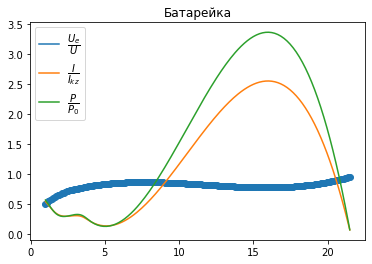

In [ ]:
plt.plot(xnew_db, y_smooth_db1, label=r'$\dfrac{U_e}{U}$')
plt.plot(xnew_db, y_smooth_db2, label=r'$\dfrac{I}{I_{kz}}$')
plt.plot(xnew_db, y_smooth_db3, label=r'$\dfrac{P}{P_0}$')
plt.scatter(xnew_db, y_smooth_db1)
plt.title('Батарейка')
plt.legend()
plt.show()

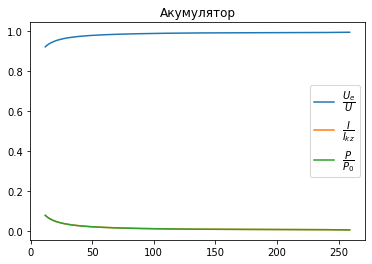

In [ ]:
plt.plot(xnew_da, y_smooth_da1, label=r'$\dfrac{U_e}{U}$')
plt.plot(xnew_da, y_smooth_da2, label=r'$\dfrac{I}{I_{kz}}$')
plt.plot(xnew_da, y_smooth_da3, label=r'$\dfrac{P}{P_0}$')
plt.title('Акумулятор')
plt.legend()
plt.show()

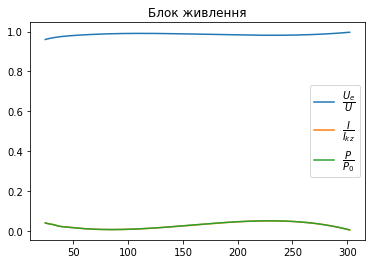

In [ ]:
plt.plot(xnew_dps, y_smooth_dps1, label=r'$\dfrac{U_e}{U}$')
plt.plot(xnew_dps, y_smooth_dps2, label=r'$\dfrac{I}{I_{kz}}$')
plt.plot(xnew_dps, y_smooth_dps3, label=r'$\dfrac{P}{P_0}$')
plt.title('Блок живлення')
plt.legend()
plt.show()

## And some more graphs

In [ ]:
data_battery = {
    'I/I_kz' : np.absolute(np.divide(battery['I'], battery['I_kz'])),
    'P_e/P_0' : battery['P_e/P_0'],
    'P_i/P_0' : battery['P_i/P_0'],
    'P/P_0' : battery['P/P_0']
}
data_accumulator = {
    'I/I_kz' : np.absolute(np.divide(accumulator['I'], accumulator['I_kz'])),
    'P_e/P_0' : accumulator['P_e/P_0'],
    'P_i/P_0' : accumulator['P_i/P_0'],
    'P/P_0' : accumulator['P/P_0']
}
data_power_supply = {
    'I/I_kz' : np.absolute(np.divide(power_supply['I'], power_supply['I_kz'])),
    'P_e/P_0' : power_supply['P_e/P_0'],
    'P_i/P_0' : power_supply['P_i/P_0'],
    'P/P_0' : power_supply['P/P_0']
}

In [ ]:
#battery
xnew_db = np.linspace(data_battery['I/I_kz'].min(), data_battery['I/I_kz'].max(), 200) 
spl_db1 = make_interp_spline(data_battery['I/I_kz'], data_battery['P_e/P_0'], k=3)
y_smooth_db1 = spl_db1(xnew_db)
spl_db2 = make_interp_spline(data_battery['I/I_kz'], data_battery['P_i/P_0'], k=3)
y_smooth_db2 = spl_db2(xnew_db)
spl_db3 = make_interp_spline(data_battery['I/I_kz'], data_battery['P/P_0'], k=3)
y_smooth_db3 = spl_db3(xnew_db)

#accumulator
xnew_da = np.linspace(data_accumulator['I/I_kz'].min(), data_accumulator['I/I_kz'].max(), 200) 
spl_da1 = make_interp_spline(data_accumulator['I/I_kz'], data_accumulator['P_e/P_0'], k=3)
y_smooth_da1 = spl_da1(xnew_da)
spl_da2 = make_interp_spline(data_accumulator['I/I_kz'], data_accumulator['P_i/P_0'], k=3)
y_smooth_da2 = spl_da2(xnew_da)
spl_da3 = make_interp_spline(data_accumulator['I/I_kz'], data_accumulator['P/P_0'], k=3)
y_smooth_da3 = spl_da3(xnew_da)

#power_supply
xnew_dps = np.linspace(data_power_supply['I/I_kz'].min(), data_power_supply['I/I_kz'].max(), 200) 
spl_dps1 = make_interp_spline(data_power_supply['I/I_kz'], data_power_supply['P_e/P_0'], k=3)
y_smooth_dps1 = spl_dps1(xnew_dps)
spl_dps2 = make_interp_spline(data_power_supply['I/I_kz'], data_power_supply['P_i/P_0'], k=3)
y_smooth_dps2 = spl_dps2(xnew_dps)
spl_dps3 = make_interp_spline(data_power_supply['I/I_kz'], data_power_supply['P/P_0'], k=3)
y_smooth_dps3 = spl_dps3(xnew_dps)

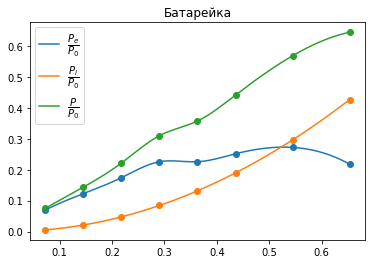

In [ ]:
plt.plot(xnew_db, y_smooth_db1, label=r'$\dfrac{P_e}{P_0}$')
plt.plot(xnew_db, y_smooth_db2, label=r'$\dfrac{P_i}{P_0}$')
plt.plot(xnew_db, y_smooth_db3, label=r'$\dfrac{P}{P_0}$')
plt.title('Батарейка')
plt.scatter(data_battery['I/I_kz'], data_battery['P_e/P_0'])
plt.scatter(data_battery['I/I_kz'], data_battery['P_i/P_0'])
plt.scatter(data_battery['I/I_kz'], data_battery['P/P_0'])
plt.legend()
plt.show()

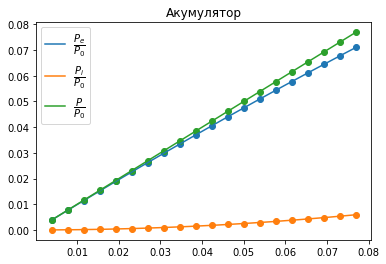

In [ ]:
plt.plot(xnew_da, y_smooth_da1, label=r'$\dfrac{P_e}{P_0}$')
plt.plot(xnew_da, y_smooth_da2, label=r'$\dfrac{P_i}{P_0}$')
plt.plot(xnew_da, y_smooth_da3, label=r'$\dfrac{P}{P_0}$')
plt.scatter(data_accumulator['I/I_kz'], data_accumulator['P_e/P_0'])
plt.scatter(data_accumulator['I/I_kz'], data_accumulator['P_i/P_0'])
plt.scatter(data_accumulator['I/I_kz'], data_accumulator['P/P_0'])
plt.title('Акумулятор')
plt.legend()
plt.show()

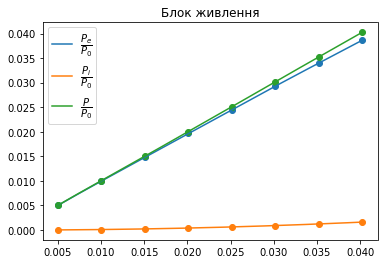

In [ ]:
plt.plot(xnew_dps, y_smooth_dps1, label=r'$\dfrac{P_e}{P_0}$')
plt.plot(xnew_dps, y_smooth_dps2, label=r'$\dfrac{P_i}{P_0}$')
plt.plot(xnew_dps, y_smooth_dps3, label=r'$\dfrac{P}{P_0}$')
plt.title('Блок живлення')
plt.scatter(data_power_supply['I/I_kz'], data_power_supply['P_e/P_0'])
plt.scatter(data_power_supply['I/I_kz'], data_power_supply['P_i/P_0'])
plt.scatter(data_power_supply['I/I_kz'], data_power_supply['P/P_0'])
plt.legend()
plt.show()

# Lab 3

## Part 1

In [ ]:
data1 = {
    "R": np.array([10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200])[::-1],
    "f": np.array([1.6 * 10**4, 1.06*10**4, 8.0*10**3, 6.4*10**3, 5.3*10**3, 3.3*10**3, 3.0*10**3, 2.6*10**3, 1.6*10**3, 1.06*10**3, 8.0*10**2])[::-1],
    "X_c": np.array([10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200])[::-1]
}
data2 = {
    "R": np.array([10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200])[::-1],
    "f": np.array([7.3 * 10**3, 4.8*10**3, 3.6*10**3, 3.0*10**3, 2.4*10**3, 1.8*10**3, 1.5*10**3, 1.18*10**3, 7.3*10**2, 4.8*10**2, 3.6*10**2])[::-1],
    "X_c": np.array([10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200])[::-1]
}
data3 = {
    "R": np.array([10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200])[::-1],
    "f": np.array([3.65 * 10**3, 2.4*10**3, 1.8*10**3, 1.5*10**3, 1.2*10**3, 0.9*10**3, 0.75*10**3, 0.59*10**3, 3.65*10**2, 2.4*10**2, 1.8*10**2])[::-1],
    "X_c": np.array([10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200])[::-1]
}

In [ ]:
all_data = {
    'b': [],
    'C_theor': np.array([1.0*pow(10, -6), 2.2*pow(10, -6), 4.4*pow(10, -6)]),
    'C_exp' : []
}

In [ ]:
xnew_1 = np.linspace(data1['f'].min(), data1['f'].max(), 200) 
spl_1 = make_interp_spline(data1['f'], data1['X_c'], k=3)
y_smooth_1 = spl_1(xnew_1)

xnew_2 = np.linspace(data2['f'].min(), data2['f'].max(), 200) 
spl_2 = make_interp_spline(data2['f'], data2['X_c'], k=3)
y_smooth_2 = spl_2(xnew_2)

xnew_3 = np.linspace(data3['f'].min(), data3['f'].max(), 200) 
spl_3 = make_interp_spline(data3['f'], data3['X_c'], k=3)
y_smooth_3 = spl_3(xnew_3)


## Graph of dependecy between approximized $f$ and $R$

In [ ]:
def approximate(x, y):

  n = len(x)

  b = (n * np.sum(np.divide(y, x)) - np.sum(np.divide(1, x)) * np.sum(y)) / (n * np.sum(np.divide(1, np.power(x, 2))) - (np.sum(np.divide(1, x))) ** 2)
  a = ((1 / n) * np.sum(y)) - (b / n) * np.sum(np.divide(1, x))


  y=[a+b/x[i] for i in range(0, len(x))]

  return y, a, b

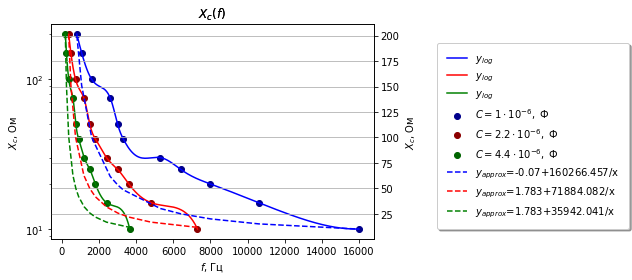

In [ ]:
'''   SELECTING DATA    '''
x_1=data1['f']
y_1=data1['X_c']
x_2=data2['f']
y_2=data2['X_c']
x_3=data3['f']
y_3=data3['X_c']

'''   LINEAR REGRESSION    '''
linear_model_1=np.polyfit(np.log(x_1),y_1,1)
linear_model_fn_1=np.poly1d(linear_model_1)
linear_model_2=np.polyfit(np.log(x_2),y_2,1)
linear_model_fn_2=np.poly1d(linear_model_2)
linear_model_3=np.polyfit(np.log(x_3),y_3,1)
linear_model_fn_3=np.poly1d(linear_model_3)

'''   PLOT    '''
fig, ax1 = plt.subplots()

'''   LOG PLOT    '''

ax1.set_yscale("log")
ax1.set_title(r"$X_c(f)$")
ax1.set_ylabel("$X_c$, Ом")
ax1.set_xlabel(r"$f$, Гц")

#   1
ax1.scatter(x_1,y_1,color="darkblue")
ax1.plot(xnew_1, y_smooth_1, 'b')
#   2
ax1.scatter(x_2,y_2,color="darkred")
ax1.plot(xnew_2, y_smooth_2, 'r')
#   3
ax1.scatter(x_3,y_3,color="darkgreen")
ax1.plot(xnew_3, y_smooth_3, 'g')



'''   LINEAR PLOT    '''

ax2 = ax1.twinx() 

ax2.set_yscale("linear")
ax2.set_title(r"$X_c(f)$")
ax2.set_ylabel("$X_c$, Ом")
ax2.set_xlabel(r"$f$, Гц")

#   1
y_1, a_1, b_1 = approximate(x_1, y_1)
ax2.plot(x_1,y_1,color="blue", linestyle="dashed")
#ax2.plot(x_1,linear_model_fn_1(np.log(x_1)),color="blue", linestyle="dashed")
#   2
y_2, a_2, b_2 = approximate(x_2, y_2)
ax2.plot(x_2,y_2,color="red", linestyle="dashed")
#ax2.plot(x_2,linear_model_fn_2(np.log(x_2)),color="red", linestyle="dashed")
#   3
y_3, a_3, b_3 = approximate(x_3, y_3)
ax2.plot(x_3,y_3,color="green", linestyle="dashed")
#ax2.plot(x_3,linear_model_fn_3(np.log(x_3)),color="green", linestyle="dashed")


#fig.legend([r'$y_{log}$', r'$y_{log}$', r'$y_{log}$', r'$C=1\cdot 10^{-6},$ Ф', r'$C=2.2\cdot 10^{-6},$ Ф',  r'$C=4.4\cdot 10^{-6},$ Ф', r'$y_{approx}$'+f'={str(np.poly1d(linear_model_1))}', r'$y_{approx}$'+f'={str(np.poly1d(linear_model_2))}', r'$y_{approx}$'+f'={str(np.poly1d(linear_model_3))}'], fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='center left', bbox_to_anchor=(1, 0.5))
fig.legend([r'$y_{log}$', r'$y_{log}$', r'$y_{log}$', r'$C=1\cdot 10^{-6},$ Ф', r'$C=2.2\cdot 10^{-6},$ Ф',  r'$C=4.4\cdot 10^{-6},$ Ф', r'$y_{approx}$'+f'={round(a_1, 3)}+{round(b_1, 3)}/x', r'$y_{approx}$'+f'={round(a_2, 3)}+{round(b_2, 3)}/x', r'$y_{approx}$'+f'={round(a_3, 3)}+{round(b_3, 3)}/x'], fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()

## Calculations

In [ ]:
all_data.update({'b': np.array([abs(b_1), abs(b_2), abs(b_3)])})

In [ ]:
all_data.update({'C_exp': np.multiply(np.divide(1, np.multiply(2, np.multiply(np.pi, all_data['b']))), 1)})

In [ ]:
all_data.update({'abs error': np.abs(np.subtract(all_data['C_theor'], all_data['C_exp']))})

In [ ]:
all_data.update({'error': np.divide(all_data['abs error'], all_data['C_theor'])})

In [ ]:
all_data.update({'X_c1': np.multiply(np.divide(1, np.multiply(2, np.multiply(np.pi, np.multiply(3000, all_data['C_exp'])))), pow(10, -6))})

In [ ]:
all_data.update({'X_c2': np.multiply(np.divide(1, np.multiply(2, np.multiply(np.pi, np.multiply(2500, all_data['C_exp'])))), pow(10, -6))})

In [ ]:
all_data.update({'X_c3': np.multiply(np.divide(1, np.multiply(2, np.multiply(np.pi, np.multiply(2000, all_data['C_exp'])))), pow(10, -6))})

In [ ]:
#pd.options.display.float_format = '{:.10f}'.format
pd.DataFrame.from_dict(all_data)

,b,C_theor,C_exp,abs error,error,X_c1,X_c2,X_c3
0,160266.457,0.000,0.000,0.000,0.007,0.000,0.000,0.000
1,71884.082,0.000,0.000,0.000,0.006,0.000,0.000,0.000
2,35942.041,0.000,0.000,0.000,0.006,0.000,0.000,0.000


## Graph of dependecy between approximized $X_c$ and $C$

Text(0.5, 0, '$C_{exp}$, Ом')

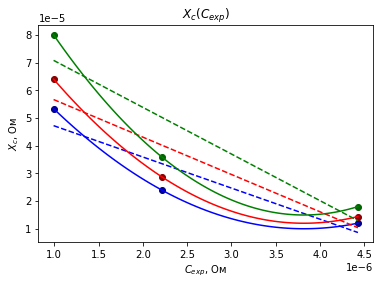

In [ ]:
x=all_data['C_exp']
y_1=all_data['X_c1']
y_2=all_data['X_c2']
y_3=all_data['X_c3']

linear_model_1=np.polyfit(x,y_1,1)
linear_model_fn_1=np.poly1d(linear_model_1)
linear_model_2=np.polyfit(x,y_2,1)
linear_model_fn_2=np.poly1d(linear_model_2)
linear_model_3=np.polyfit(x,y_3,1)
linear_model_fn_3=np.poly1d(linear_model_3)

xnew = np.linspace(x.min(), x.max(), 100) 
spl_1 = make_interp_spline(x, y_1, k=2)
y_smooth_1 = spl_1(xnew)
spl_2 = make_interp_spline(x, y_2, k=2)
y_smooth_2 = spl_2(xnew)
spl_3 = make_interp_spline(x, y_3, k=2)
y_smooth_3 = spl_3(xnew)

plt.scatter(x,y_1, color="darkblue")
plt.plot(xnew,y_smooth_1, color="blue")
plt.plot(x,linear_model_fn_1(x), color="blue", linestyle="dashed") 
plt.scatter(x,y_2, color="darkred")
plt.plot(xnew,y_smooth_2, color="red")
plt.plot(x,linear_model_fn_2(x), color="red", linestyle="dashed") 
plt.scatter(x,y_3, color="darkgreen")
plt.plot(xnew,y_smooth_3, color="green")
plt.plot(x,linear_model_fn_3(x), color="green", linestyle="dashed") 
plt.title(r"$X_c(C_{exp})$")
plt.ylabel(r"$X_c$, Ом")
plt.xlabel(r"$C_{exp}$, Ом")

## Calculations

In [ ]:
new_data1 = {
    'X_c': data1['X_c'],
    'f': data1['f'],
    'C': np.repeat(1, len(data1['X_c'])),
    'R': np.repeat(50, len(data1['X_c'])),

}
new_data2 = {
    'X_c': data2['X_c'],
    'f': data2['f'],
    'C': np.repeat(1, len(data2['X_c'])),
    'R': np.repeat(50, len(data2['X_c'])),

}
new_data3 = {
    'X_c': data3['X_c'],
    'f': data3['f'],
    'C': np.repeat(1, len(data3['X_c'])),
    'R': np.repeat(50, len(data3['X_c'])),

}

In [ ]:
def calculate_phi(data):
  data.update({'tan phi': np.multiply(-1, np.divide(data['X_c'], data['R']))})
  data.update({'phi': np.arctan(data['tan phi'])})

  return data

In [ ]:
new_data1 = calculate_phi(new_data1)
new_data2 = calculate_phi(new_data2)
new_data3 = calculate_phi(new_data3)

## Display data

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame.from_dict(new_data1).round(2)

,X_c,f,C,R,tan phi,phi
0,200,800.00,1,50,-4.00,-1.33
1,150,1060.00,1,50,-3.00,-1.25
2,100,1600.00,1,50,-2.00,-1.11
3,75,2600.00,1,50,-1.50,-0.98
4,50,3000.00,1,50,-1.00,-0.79
5,40,3300.00,1,50,-0.80,-0.67
6,30,5300.00,1,50,-0.60,-0.54
7,25,6400.00,1,50,-0.50,-0.46
8,20,8000.00,1,50,-0.40,-0.38
9,15,10600.00,1,50,-0.30,-0.29


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame.from_dict(new_data2).round(2)

,X_c,f,C,R,tan phi,phi
0,200,360.00,1,50,-4.00,-1.33
1,150,480.00,1,50,-3.00,-1.25
2,100,730.00,1,50,-2.00,-1.11
3,75,1180.00,1,50,-1.50,-0.98
4,50,1500.00,1,50,-1.00,-0.79
5,40,1800.00,1,50,-0.80,-0.67
6,30,2400.00,1,50,-0.60,-0.54
7,25,3000.00,1,50,-0.50,-0.46
8,20,3600.00,1,50,-0.40,-0.38
9,15,4800.00,1,50,-0.30,-0.29


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame.from_dict(new_data3).round(2)

,X_c,f,C,R,tan phi,phi
0,200,180.00,1,50,-4.00,-1.33
1,150,240.00,1,50,-3.00,-1.25
2,100,365.00,1,50,-2.00,-1.11
3,75,590.00,1,50,-1.50,-0.98
4,50,750.00,1,50,-1.00,-0.79
5,40,900.00,1,50,-0.80,-0.67
6,30,1200.00,1,50,-0.60,-0.54
7,25,1500.00,1,50,-0.50,-0.46
8,20,1800.00,1,50,-0.40,-0.38
9,15,2400.00,1,50,-0.30,-0.29


In [ ]:
for i in new_data1:
  new_data1[i] = new_data1[i][::-1]

In [ ]:
for i in new_data2:
  new_data2[i] = new_data2[i][::-1]

In [ ]:
for i in new_data3:
  new_data3[i] = new_data3[i][::-1]

## Graph of dependecy between approximized $f$ and $\varphi$ 

Text(0, 0.5, '$\\varphi$, р')

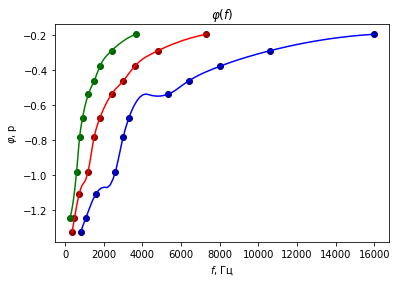

In [ ]:
x_1=new_data1['f'][::-1]
y_1=new_data1['phi'][::-1]
x_2=new_data2['f'][::-1]
y_2=new_data2['phi'][::-1]
x_3=np.delete(new_data3['f'], 8)[:-1][::-1]
y_3=np.delete(new_data3['phi'], 8)[:-1][::-1]

xnew_1 = np.linspace(x_1.min(), x_1.max(), 100) 
spl_1 = make_interp_spline(x_1, y_1, k=2)
y_smooth_1 = spl_1(xnew_1)
xnew_2 = np.linspace(x_2.min(), x_2.max(), 100) 
spl_2 = make_interp_spline(x_2, y_2, k=2)
y_smooth_2 = spl_2(xnew_2)
xnew_3 = np.linspace(x_3.min(), x_3.max(), 100) 
spl_3 = make_interp_spline(x_3, y_3, k=2)
y_smooth_3 = spl_3(xnew_3)

plt.scatter(x_1, y_1, color="darkblue")
plt.plot(xnew_1, y_smooth_1, 'b')
plt.scatter(x_2, y_2, color="darkred")
plt.plot(xnew_2, y_smooth_2, 'r')
plt.scatter(x_3, y_3, color="darkgreen")
plt.plot(xnew_3, y_smooth_3, 'g')
plt.title(r"$\varphi(f)$")
plt.xlabel(r"$f$, Гц")
plt.ylabel(r"$\varphi$, р")

## Part 2

In [ ]:
data1 = {
    'R': np.array([10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200]),
    'f': np.array([1.6*10**2, 2.4*10**2, 3.2*10**2, 4*10**2, 4.8*10**2, 6.4*10**2, 8*10**2, 1.2*10**3, 1.6*10**3, 2.4*10**3, 3.2*10**3]),
    'X_l': np.array([10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200])
}
data2 = {
    'R': np.array([10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200]),
    'f': np.array([1.6*10**3, 2.4*10**3, 3.2*10**3, 4*10**3, 4.8*10**3, 6.4*10**3, 8*10**3, 1.2*10**4, 1.6*10**4, 2.4*10**4, 3.2*10**4]),
    'X_l': np.array([10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200])
}
data3 = {
    'R': np.array([10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200]),
    'f': np.array([8*10**2, 1.2*10**3, 1.6*10**3, 2*10**3, 2.4*10**3, 3.2*10**3, 4*10**3, 6*10**3, 8*10**3, 1.2*10**4, 1.6*10**4]),
    'X_l': np.array([10, 15, 20, 25, 30, 40, 50, 75, 100, 150, 200])
}

In [ ]:
xnew_1 = np.linspace(data1['R'].min(), data1['R'].max(), 200) 
spl_1 = make_interp_spline(data1['R'], data1['f'], k=3)
y_smooth_1 = spl_1(xnew_1)

xnew_2 = np.linspace(data2['R'].min(), data2['R'].max(), 200) 
spl_2 = make_interp_spline(data2['R'], data2['f'], k=3)
y_smooth_2 = spl_2(xnew_2)

xnew_3 = np.linspace(data3['R'].min(), data3['R'].max(), 200) 
spl_3 = make_interp_spline(data3['R'], data3['f'], k=3)
y_smooth_3 = spl_3(xnew_3)


## Graph of dependecy between approximized $f$ and $X_l$

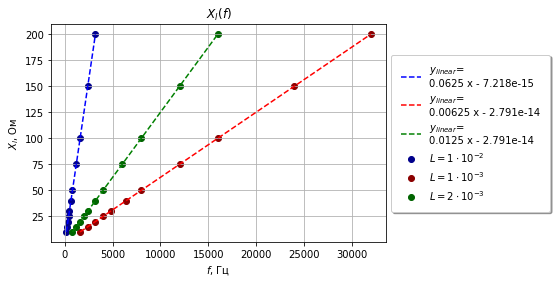

In [ ]:
'''   SELECTING DATA    '''
x_1=data1['f']
y_1=data1['X_l']
x_2=data2['f']
y_2=data2['X_l']
x_3=data3['f']
y_3=data3['X_l']

'''   LINEAR REGRESSION    '''
linear_model_1=np.polyfit(x_1,y_1,1)
linear_model_fn_1=np.poly1d(linear_model_1)
linear_model_2=np.polyfit(x_2,y_2,1)
linear_model_fn_2=np.poly1d(linear_model_2)
linear_model_3=np.polyfit(x_3,y_3,1)
linear_model_fn_3=np.poly1d(linear_model_3)

'''   PLOT    '''

plt.title(r"$X_l(f)$")
plt.ylabel("$X_l$, Ом")
plt.xlabel(r"$f$, Гц")

#   1
plt.scatter(x_1,y_1,color="darkblue")
#plt.plot(xnew_1, y_smooth_1, 'b')
#   2
plt.scatter(x_2,y_2,color="darkred")
#plt.plot(xnew_2, y_smooth_2, 'r')
#   3
plt.scatter(x_3,y_3,color="darkgreen")
#plt.plot(xnew_3, y_smooth_3, 'g')

#   1
plt.plot(x_1,linear_model_fn_1(x_1),color="blue", linestyle="dashed")
#   2
plt.plot(x_2,linear_model_fn_2(x_2),color="red", linestyle="dashed")
#   3
plt.plot(x_3,linear_model_fn_3(x_3),color="green", linestyle="dashed")

plt.legend([r'$y_{linear}$'+f'={str(np.poly1d(linear_model_1))}', r'$y_{linear}$'+f'={str(np.poly1d(linear_model_2))}', r'$y_{linear}$'+f'={str(np.poly1d(linear_model_3))}', r'$L=1\cdot 10^{-2}$', r'$L=1\cdot 10^{-3}$', r'$L=2\cdot 10^{-3}$'], fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()

## Calculations

In [ ]:
all_data = {
    'k': [],
    'L_theor': np.array([1.0*pow(10, -2), 1.0*pow(10, -3), 2*pow(10, -3)]),
    'L_exp' : []
}

In [ ]:
all_data.update({'k': np.array([abs(np.poly1d(linear_model_1)[1]), abs(np.poly1d(linear_model_2)[1]), abs(np.poly1d(linear_model_3)[1])])})

In [ ]:
all_data.update({'L_exp': np.multiply(np.divide(all_data['k'], 2*np.pi), 1)})

In [ ]:
all_data.update({'abs error': np.abs(np.subtract(all_data['L_theor'], all_data['L_exp']))})

In [ ]:
all_data.update({'error': np.divide(all_data['abs error'], all_data['L_theor'])})

In [ ]:
all_data.update({'X_l1': np.multiply(3000, all_data['k'])})

In [ ]:
all_data.update({'X_l2': np.multiply(2500, all_data['k'])})

In [ ]:
all_data.update({'X_l3': np.multiply(2000, all_data['k'])})

In [ ]:
pd.options.display.float_format = '{:.10f}'.format
pd.DataFrame.from_dict(all_data).round(10)

,k,L_theor,L_exp,abs error,error,X_l1,X_l2,X_l3
0,0.0625000000,0.0100000000,0.0099471839,0.0000528161,0.0052816057,187.5000000000,156.2500000000,125.0000000000
1,0.0062500000,0.0010000000,0.0009947184,0.0000052816,0.0052816057,18.7500000000,15.6250000000,12.5000000000
2,0.0625000000,0.0020000000,0.0099471839,0.0079471839,3.9735919716,187.5000000000,156.2500000000,125.0000000000


In [ ]:
for i in all_data:
  all_data[i][0], all_data[i][1], all_data[i][2] = all_data[i][1], all_data[i][2], all_data[i][0]

## Graph of dependecy between approximized $X_l$ and $L$

Text(0.5, 0, '$L_{exp}$, Ом')

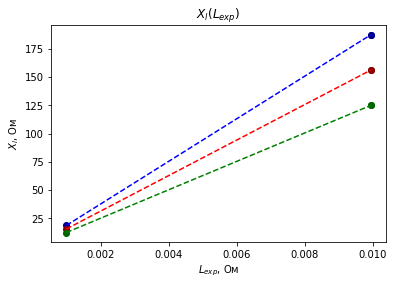

In [ ]:
x=all_data['L_exp']
y_1=all_data['X_l1']
y_2=all_data['X_l2']
y_3=all_data['X_l3']

linear_model_1=np.polyfit(x,y_1,1)
linear_model_fn_1=np.poly1d(linear_model_1)
linear_model_2=np.polyfit(x,y_2,1)
linear_model_fn_2=np.poly1d(linear_model_2)
linear_model_3=np.polyfit(x,y_3,1)
linear_model_fn_3=np.poly1d(linear_model_3)

plt.scatter(x,y_1, color="darkblue")
plt.plot(x,linear_model_fn_1(x), color="blue", linestyle="dashed") 
plt.scatter(x,y_2, color="darkred")
plt.plot(x,linear_model_fn_2(x), color="red", linestyle="dashed") 
plt.scatter(x,y_3, color="darkgreen")
plt.plot(x,linear_model_fn_3(x), color="green", linestyle="dashed") 
plt.title(r"$X_l(L_{exp})$")
plt.ylabel(r"$X_l$, Ом")
plt.xlabel(r"$L_{exp}$, Ом")

## Calculations

In [ ]:
new_data1 = {
    'X_l': data1['X_l'],
    'f': data1['f'],
    'L': np.repeat(1, len(data1['X_l'])),
    'R': np.repeat(50, len(data1['X_l'])),

}
new_data2 = {
    'X_l': data2['X_l'],
    'f': data2['f'],
    'L': np.repeat(1, len(data2['X_l'])),
    'R': np.repeat(50, len(data2['X_l'])),

}
new_data3 = {
    'X_l': data3['X_l'],
    'f': data3['f'],
    'L': np.repeat(1, len(data3['X_l'])),
    'R': np.repeat(50, len(data3['X_l'])),

}

In [ ]:
def calculate_phi(data):
  data.update({'tan phi': np.divide(data['X_l'], data['R'])})
  data.update({'phi': np.arctan(data['tan phi'])})

  return data

In [ ]:
new_data1 = calculate_phi(new_data1)
new_data2 = calculate_phi(new_data2)
new_data3 = calculate_phi(new_data3)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame.from_dict(new_data1).round(2)

,X_l,f,L,R,tan phi,phi
0,10,160.00,1,50,0.20,0.20
1,15,240.00,1,50,0.30,0.29
2,20,320.00,1,50,0.40,0.38
3,25,400.00,1,50,0.50,0.46
4,30,480.00,1,50,0.60,0.54
5,40,640.00,1,50,0.80,0.67
6,50,800.00,1,50,1.00,0.79
7,75,1200.00,1,50,1.50,0.98
8,100,1600.00,1,50,2.00,1.11
9,150,2400.00,1,50,3.00,1.25


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame.from_dict(new_data2).round(2)

,X_l,f,L,R,tan phi,phi
0,10,1600.00,1,50,0.20,0.20
1,15,2400.00,1,50,0.30,0.29
2,20,3200.00,1,50,0.40,0.38
3,25,4000.00,1,50,0.50,0.46
4,30,4800.00,1,50,0.60,0.54
5,40,6400.00,1,50,0.80,0.67
6,50,8000.00,1,50,1.00,0.79
7,75,12000.00,1,50,1.50,0.98
8,100,16000.00,1,50,2.00,1.11
9,150,24000.00,1,50,3.00,1.25


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame.from_dict(new_data3).round(2)

,X_l,f,L,R,tan phi,phi
0,10,800.00,1,50,0.20,0.20
1,15,1200.00,1,50,0.30,0.29
2,20,1600.00,1,50,0.40,0.38
3,25,2000.00,1,50,0.50,0.46
4,30,2400.00,1,50,0.60,0.54
5,40,3200.00,1,50,0.80,0.67
6,50,4000.00,1,50,1.00,0.79
7,75,6000.00,1,50,1.50,0.98
8,100,8000.00,1,50,2.00,1.11
9,150,12000.00,1,50,3.00,1.25


## Graph of dependecy between approximized $f$ and $\varphi$

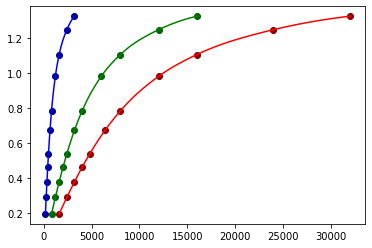

In [ ]:
x_1=new_data1['f']
y_1=new_data1['phi']
x_2=new_data2['f']
y_2=new_data2['phi']
x_3=new_data3['f']
y_3=new_data3['phi']


xnew_1 = np.linspace(x_1.min(), x_1.max(), 100) 
spl_1 = make_interp_spline(x_1, y_1, k=2)
y_smooth_1 = spl_1(xnew_1)
xnew_2 = np.linspace(x_2.min(), x_2.max(), 100) 
spl_2 = make_interp_spline(x_2, y_2, k=2)
y_smooth_2 = spl_2(xnew_2)
xnew_3 = np.linspace(x_3.min(), x_3.max(), 100) 
spl_3 = make_interp_spline(x_3, y_3, k=2)
y_smooth_3 = spl_3(xnew_3)

plt.scatter(x_1, y_1, color="darkblue")
plt.plot(xnew_1, y_smooth_1, 'b')
plt.scatter(x_2, y_2, color="darkred")
plt.plot(xnew_2, y_smooth_2, 'r')
plt.scatter(x_3, y_3, color="darkgreen")
plt.plot(xnew_3, y_smooth_3, 'g')